In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/My Drive/machine learning/IRIS.csv'
df=pd.read_csv(file_path)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Best number of clusters (k): 2


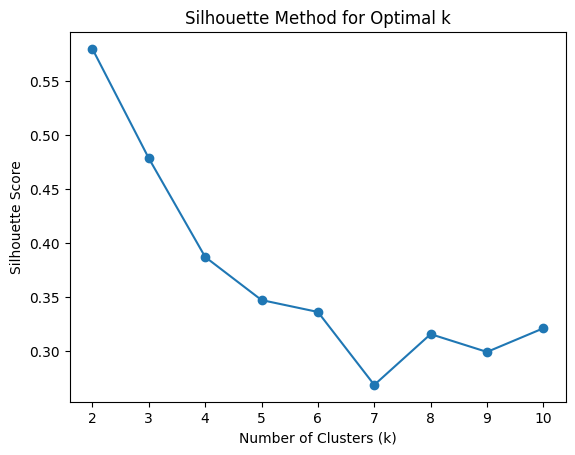

In [5]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

best_k = K[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters (k): {best_k}")
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()


In [6]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

labels = kmeans_final.labels_
centers = kmeans_final.cluster_centers_

print("\nCluster Centers (Standardized Space):\n", centers)
print("\nCluster Sizes:\n", np.bincount(labels))



Cluster Centers (Standardized Space):
 [[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]

Cluster Sizes:
 [100  50]


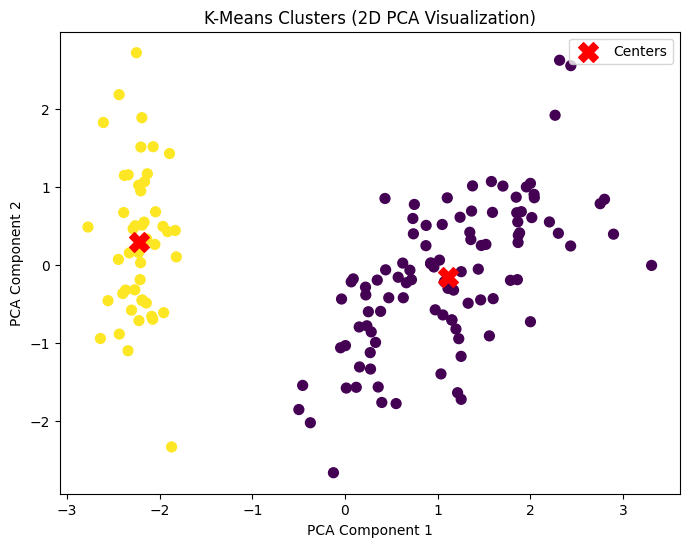

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(centers)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centers')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters (2D PCA Visualization)")
plt.legend()
plt.show()


In [8]:
if 'species' in df.columns or 'Species' in df.columns:
      species_col = 'species' if 'species' in df.columns else 'Species'
      y_true = df[species_col]
      comparison = pd.crosstab(y_true, labels,rownames=['Actual Species'], colnames=['Cluster Label'])

      print("\nMapping of true species to clusters:\n")
      print(comparison)


Mapping of true species to clusters:

Cluster Label     0   1
Actual Species         
Iris-setosa       0  50
Iris-versicolor  50   0
Iris-virginica   50   0


In [9]:
df['Cluster_Label'] = labels
print("\nDataset with cluster labels added:\n")
print(df.head())


Dataset with cluster labels added:

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Cluster_Label  
0              1  
1              1  
2              1  
3              1  
4              1  
